In [9]:
import re
import json
import pandas as pd
import numpy as np 
from math import pi
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('c:/py/covid19/data/cbc_new_features.csv', sep=';', encoding='utf-16')

In [3]:
month = []

for i in df.iterrows():
    month.append(i[1][3][5:7])
    
df['month'] = month

In [4]:
df['publish_date'] = pd.to_datetime(df['publish_date']).dt.week

VADER uses a dictionary to assign scores to the words, while considering their location within the text and punctuations to score the document with a proportion of each sentiment contained on it. Those sentiments are named negative, positive and neutral.  
  
After getting the proportions for each sentiment VADER calculates a compound. The compound is a normalized sum of all proportions, from -1 (completely negative) to 1 (completely positive).  
  
Some of the semantic contexts considered by VADER are:  
  
        Conjunctions	    E.g.: 'I like your X, but your Y is very bad';
        Negation Flips 	    E.g.: 'This is not really the greatest';
        Degrees		    E.g.: 'This is good' vs 'This is extremely good';
        Capitalization 	    E.g.: 'this is GREAT' vs 'this is great';
        Punctuation		    E.g.: 'this is great!!!' vs 'this is great'; 

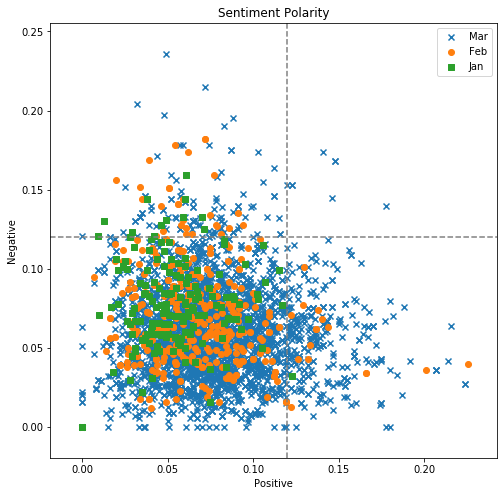

In [25]:
jan = df[df['month'] == '01']
feb = df[df['month'] == '02']
mar = df[df['month'] == '03']

fig, ax = plt.subplots(1, figsize=(8, 8))
# plot all characters sentiment
plt.scatter(mar['positive'], mar['negative'], marker='x')
plt.scatter(feb['positive'], feb['negative'], marker='o')
plt.scatter(jan['positive'], jan['negative'], marker=',')

plt.legend(['Mar', 'Feb', 'Jan'])

# set grid lines
ax.axhline(0.12, linestyle='--', color='grey')
ax.axvline(0.12, linestyle='--', color='grey')
# set limits
plt.xlabel('Positive')
plt.ylabel('Negative')
plt.title('Sentiment Polarity')
plt.savefig('every_polarity_score.png', facecolor='white', edgecolor='none')

In [6]:
df_radar = df[df['publish_date'] < 14].groupby('publish_date').mean()
df_radar = df_radar[['positive', 'neutral', 'negative']]
df_radar.columns = ['POS', 'NEU', 'NEG']

# normalize
# z-score = ( x - mean ) / standard deviation
normalized_df = (df_radar - df_radar.mean()) / df_radar.std()

# option 2, normalize by range (x - min)/(max - min)
#normalized_df = (df_radar-df_radar.min())/(df_radar.max()-df_radar.min())

normalized_df.head()

,POS,NEU,NEG
publish_date,,,
2,-1.338008,0.621014,1.430808
3,-2.056587,2.920060,0.064763
4,-0.502893,-0.426065,1.225049
5,-0.765598,-0.056645,1.236610
6,0.191754,-0.497610,0.230344


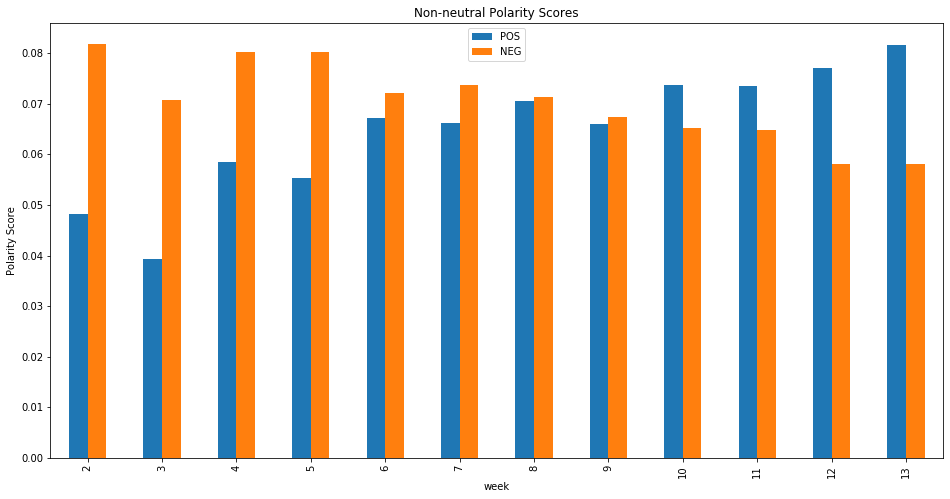

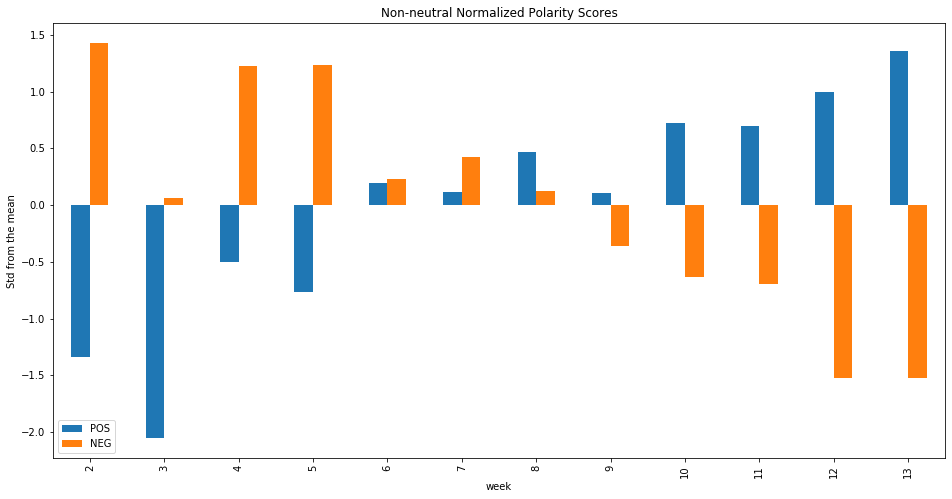

In [26]:
# Scores
fig, ax = plt.subplots(1, figsize=(16,8))
df_radar.plot(kind='bar', y=['POS','NEG'], ax=ax)
plt.xlabel('week')
plt.ylabel('Polarity Score')
plt.title('Non-neutral Polarity Scores')
plt.savefig('polarity_scores.png', facecolor='white', edgecolor='none')

# Normalized
fig, ax = plt.subplots(1, figsize=(16,8))

normalized_df.plot(kind='bar', y=['POS','NEG'], ax=ax)
plt.xlabel('week')
plt.ylabel('Std from the mean')
plt.title('Non-neutral Normalized Polarity Scores')
plt.savefig('norm_polarity_scores.png', facecolor='white', edgecolor='none')

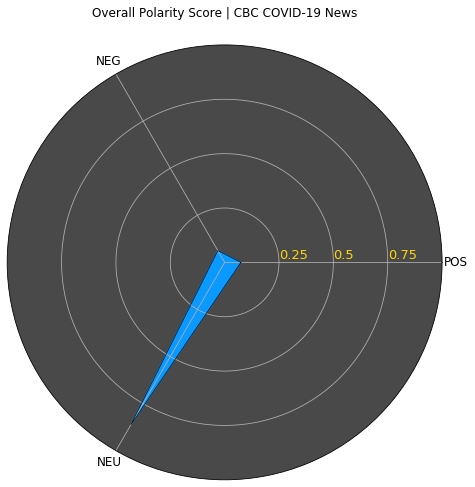

In [27]:
# define figure size
fig, ax = plt.subplots(1, figsize=(8, 8))

# get the fields to a list
categories = ['POS', 'NEG', 'NEU']
N = len(categories)

# Add values to a list and repeat last value to close the triangle
values = df[['positive', 'negative', 'neutral']].mean().values.tolist()
values += values[:1]

# calculate the angles and repeat last value to close the cirle
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# define a subplot axis
ax = plt.subplot(111, polar=True, facecolor='#494949')

# plot x lines and labels (neu, pos, neg)
plt.xticks(angles[:-1], categories, color='black', size=12)

# plot circles and labels (25%, 50%, 75%)
ax.set_rlabel_position(0)

plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"],
           color="#FFD609",
           size=13,
           alpha=1)
plt.ylim(0, 1)

# Plot data (lines)
ax.plot(angles, values, linewidth=0.6, linestyle='solid', color='black')
# fill area
ax.fill(angles, values, color='#0999FF', alpha=1)

# define title and save pic
plt.title('Overall Polarity Score | CBC COVID-19 News')
#plt.savefig(normalized_df.index[index] + '.png', edgecolor='none')
plt.savefig('all_polarity_scores.png', facecolor='white', edgecolor='none')

In [11]:
df.head()

,Unnamed: 0,authors,title,publish_date,description,text,url,clean_txt,sentences,words,sentences_qty,words_qty,negative,neutral,positive,compound,month
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,13,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,canadian pharmacies limiting much medication d...,['Canadian pharmacies are limiting how much me...,"['canadian', 'pharmacies', 'are', 'limiting', ...",15,398,0.069,0.893,0.038,-0.7114,03
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,13,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,yukon government identified two places whiteho...,['The Yukon government has identified two plac...,"['the', 'yukon', 'government', 'has', 'identif...",15,301,0.047,0.914,0.039,0.1027,03
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,13,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,senate late wednesday passed unparalleled 22 t...,['The Senate late Wednesday passed an unparall...,"['the', 'senate', 'late', 'wednesday', 'passed...",43,975,0.072,0.820,0.108,0.9893,03
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,13,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...,scientists around world racing find novel ways...,['Scientists around the world are racing to fi...,"['scientists', 'around', 'the', 'world', 'are'...",25,733,0.060,0.817,0.123,0.9932,03
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,13,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...,trudeau says rules quarantine act enforced kee...,['\xa0 Trudeau says rules of Quarantine Act ...,"['trudeau', 'says', 'rules', 'of', 'quarantine...",59,1373,0.067,0.837,0.096,0.9890,03


In [21]:
temp = []
for i, j in df.iterrows():
    #print(i)
    temp.append(j['title'].upper())
    
df['title_up'] = temp

temp = []
for i, j in df.iterrows():
    #print(i)
    temp.append(j['clean_txt'].upper())
    
df['clean_txt_up'] = temp

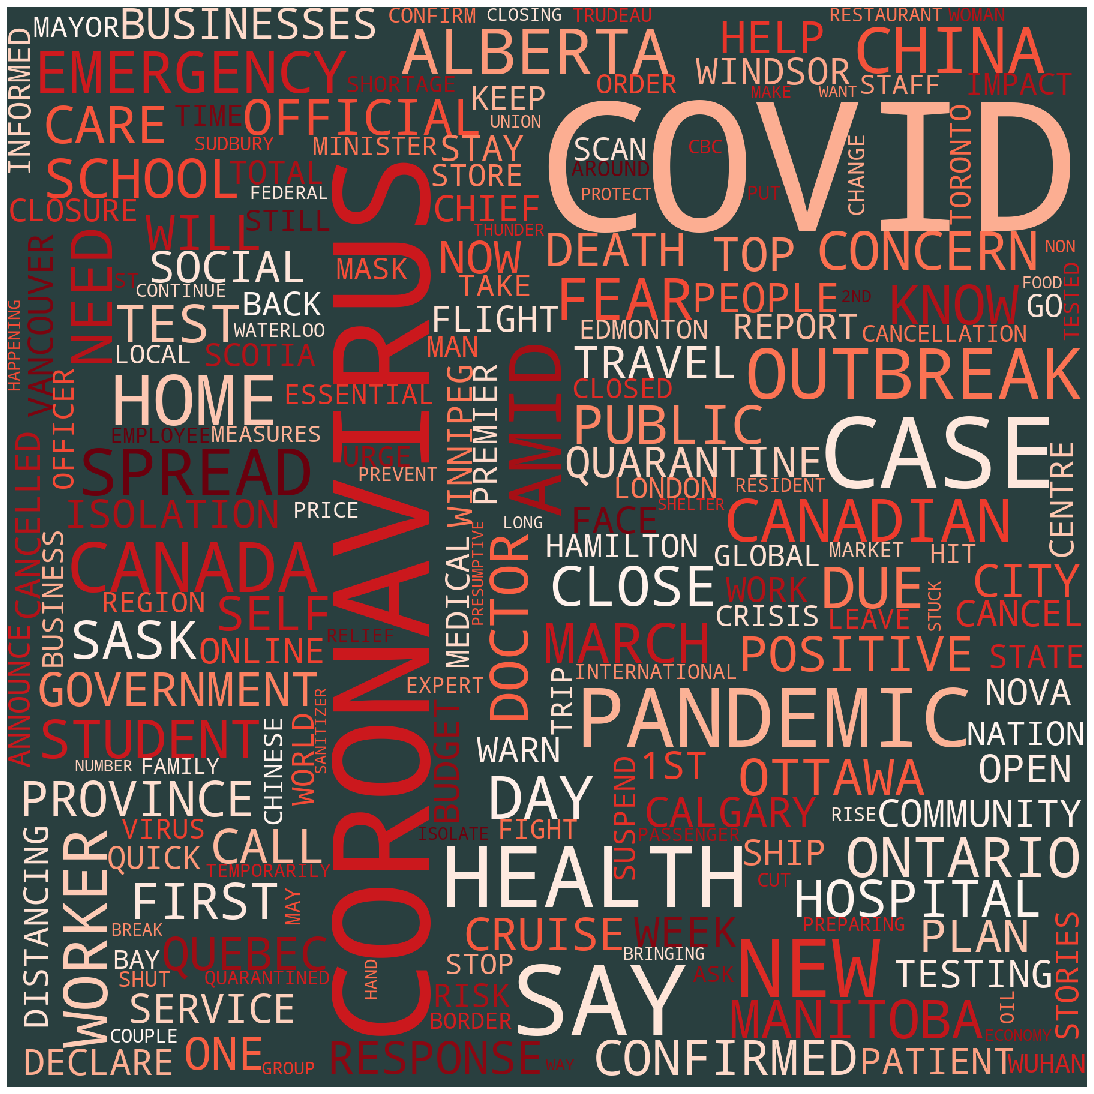

In [24]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

char_text = ' '.join(df.title_up.astype(str).values)

wordcloud = WordCloud(width=1800,
                      height=1800,
                      background_color='#293F3F',
                      colormap="Reds",
                      stopwords = STOPWORDS,
                      collocations=False,
                      max_font_size=300).generate(char_text.upper())

fig = plt.figure(figsize=(15, 15), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)